## Esercitazione di potenziamento del 30 Maggio 2023

## Esercizio 1

-   Valutare in aritmetica floating point l'espressione
$$f(x)=\frac{1}{x}-\frac{1}{(x+0.04)}$$  nel vettore   $x=[10^0, 10^1,... ,10^{20}]$ contenente potenze successive  di $10$. 

                                                [1 punto]
- Calcolare l'indice di condizionamente del problema di valutare la funzione $f(x)$ al variare x e dedurre a partire da quale valore di x esso  assume valori molto elevati. Dire cosa rappresenta l'indice di condizionamento di un problema e dire cosa misura. 

                                                [5 punti]

- Calcolare $f(x)$ per il valore di x precedente  a quello individuato dal punto precedente. perturbare questo x del 10% ed indicarlo con xp. Calcolare l'errore relativo di xp rispetto ad x. Cosa si ottiene

                                                [1 punto]
    
- Determinare se la funzione $f(x)$ è numericamente stabile? E nel caso non lo sia individuare la causa della sua instabilità.

                                                [2 punti]
 
- Fornire una formula alternativa $g(x)$ algebricamente equivalente ma numericamente più stabile. 

                                                 [2 punti]
- Calcolare l'errore relativo della funzione $f(x)$ rispetto alla funzione $g(x)$ e visuarlo graficamente in scla logaritmica sia sulle ascisse che sulle ordinate

                                                [1 punto]

In [16]:
import numpy as np
import sympy as sym
from sympy.utilities.lambdify import lambdify
import matplotlib.pyplot as plt

K =  [1.96153846 1.99601594 1.99960016 1.99996    1.999996   1.9999996
 1.99999996 2.00000006 1.99999999 2.00000257 2.00000086 2.00052087
 2.00731911 1.98035137 2.13162821        inf        inf        inf
        nan        nan        nan]


C:\Users\Utente\AppData\Local\Temp\ipykernel_5688\2458856582.py:16: RuntimeWarning: divide by zero encountered in true_divide
  k = np.abs((df_numerica(vet_x)*vet_x)/f_numerica(vet_x))
C:\Users\Utente\AppData\Local\Temp\ipykernel_5688\2458856582.py:16: RuntimeWarning: invalid value encountered in true_divide
  k = np.abs((df_numerica(vet_x)*vet_x)/f_numerica(vet_x))


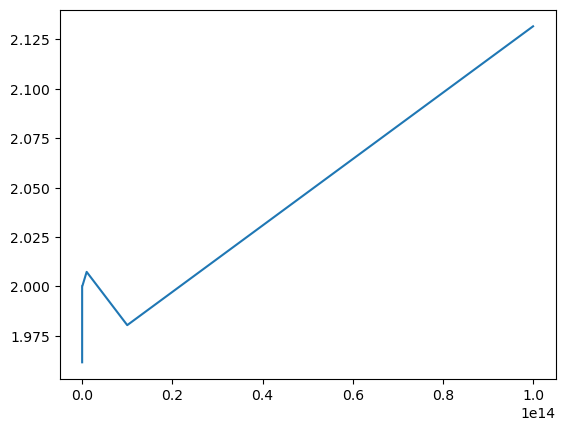

In [18]:
#Sintassi per calcolare la derivata simbolica di una funzione f rispetto alla variabile s
s = sym.symbols('s')
#Scriviamo la formula di f usando s, così anche f risulta simbolica
f = (1/s) - (1/(s+0.04))
i = np.arange(0,21)
vet_x = np.array(10.0**i)

dfs = sym.diff(f, s, 1)

f_x = f.subs(s, 10**i)
dfs_x = dfs.subs(s, 10**i)

f_numerica = lambdify(s, f_x, np)
df_numerica = lambdify(s, dfs_x, np)
    
k = np.abs((df_numerica(vet_x)*vet_x)/f_numerica(vet_x))
print("K = ", k)

plt.plot(vet_x, k)

In [22]:
x = 10**14
xp = x + 0.1*x
f_xp = f.subs(s, xp)
err_rel = np.abs((f_xp-x)/x)
print(err_rel)

1.00000000000000


## Esercizo 2
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``testC.mat.mat``.  Risolvere il sistema utilizzando il metodo più adatto al problema proposto. Argomentare dal punto di vista teorico la scelta fatta e commentare i risultati ottenuti  giustificandoli alla luce della teoria. 


La soluzione esatta del sistema lineare è il vettore x=[1,1,1,1...1 1].

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testC.mat')``

``A=dati["A"] ``

`` b=dati["b"] ``


                                                       
                                               [13 punti]

In [29]:
from scipy.io import loadmat
dati = loadmat('testC.mat')
A = dati["A"]
b = dati["b"]

if A.shape[0] > 100:
    print("La matrice è di grandi dimensioni")
else:
    print(A.shape, "La matrice non è di grandi dimensioni")
if (np.count_nonzero(A)/(A.shape[0]**2)) > 0.33:
    print("La matrice non è sparsa")

(34, 34) La matrice non è di grandi dimensioni
La matrice non è sparsa
